## Задания

**Задание 1.**

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5.

In [17]:
# задано изначально
import numpy as np
import pandas as pd

r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))

s = s.sort_values()
s = s[s > 5]
s.index[0]

67

**Задание 2.**

Имеется небольшой игрушечный DataFrame, в котором необходимо провести несколько типов фильтраций и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [37]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

df

# ваш код тут
print(df[df['возраст'] > 40])
print()
print(df[df['доход'] > df['доход'].mean()])
print()
print(df[(df['доход'] > df['доход'].mean()) & (df['надежность клиента (0..1)'] < df['надежность клиента (0..1)'].mean())])
print()
df['важность'] = df['доход'] * df['надежность клиента (0..1)']
df['возможная долгосрочность клиента'] = df['важность'] * ( df['возраст'].mean() - df['возраст'])
df

    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен

    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен

    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж



,имя,возраст,доход,надежность клиента (0..1),пол,важность,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


**Задание 3.**

Как объединить два DataFrame по двум столбцам так, чтобы остались только общие строки?

Объедините df1 и df2 по столбцам fruit-frukt и weight-ves.

In [63]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['low', 'medium', 'high'] * 3,
                    'price': np.random.randint(0, 100, 9)})

df2 = pd.DataFrame({'frukt': ['apple', 'banana', 'melon'] * 2,
                    'ves': ['low', 'high'] * 3,
                    'price': np.random.randint(0, 100, 6)})

print(df1, '\n', df2)
df = df1.merge(df2.rename(columns={'frukt':'fruit', 'ves':'weight'}), on=['fruit', 'weight'])
df

    fruit  weight  price
0   apple     low     68
1  banana  medium     75
2  orange    high     27
3   apple     low     31
4  banana  medium     58
5  orange    high     30
6   apple     low     29
7  banana  medium     89
8  orange    high     71 
     frukt   ves  price
0   apple   low     28
1  banana  high     77
2   melon   low     12
3   apple  high      6
4  banana   low     57
5   melon  high     36


,fruit,weight,price_x,price_y
0,apple,low,68,28
1,apple,low,31,28
2,apple,low,29,28


**Задание 4.** 
Сгенерировать и добавить номера телефонов следующего вида +7(000)000 00 00 в таблицу


In [94]:
def generateNumber():
     phone = '+7('
     for i in range(0, 3):
          phone += str(r.randint(0, 9))
     phone += ')'
     for i in range(0, 3):
          phone += str(r.randint(0, 9))
     phone += ' '   
     for i in range(0, 2):
          phone += str(r.randint(0, 9))
     phone += ' '   
     for i in range(0, 2):
          phone += str(r.randint(0, 9))
     return phone

d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)

phones = []

for i in range(0, df.shape[0]):
     phones.append(generateNumber())

df['Phone'] = phones

df

,Name,Age,Phone
0,Виктор,18,+7(033)835 67 51
1,Мария,21,+7(702)821 40 41
2,Иван,19,+7(731)666 60 02
3,Иван,25,+7(606)703 03 47
4,Алексей,20,+7(538)806 75 45


***Задание 1***

Скачать файл по ссылке https://disk.yandex.ru/d/ZeDbB3rqhIr1NA , считать через pandas. Получить список уникальных значений - стран в колонке "Country", отфильтровать и получить данные только по выпускникам колледжа. Убрать строки с пропусками в данных (NaN). (В случае ошибок типов можете конвертировать колонки к нужным типам через .astype(str) или .astype(int). Подсчитать макс значение, среднее и СКО для числа детей (household_children) в отфильтрованных данных.

In [113]:
df = pd.read_csv("H1N1_Flu_Vaccines.csv") 
graduated = df[df['education'] == 'College Graduate']
graduated = graduated.dropna(axis=0, how='any')
print(graduated['household_children'].max())
print(graduated['household_children'].mean())
print(graduated['household_children'].std())
graduated

3.0
0.6484499840204538
0.97167279074975


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1,1
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,wxleyezf,emcorrxb,0,0
22,22,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,fpwskwrf,"MSA, Not Principle City",2.0,1.0,wxleyezf,emcorrxb,0,0
34,34,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,2.0,wxleyezf,bxpfxfdn,1,1
47,47,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,Own,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,vjjrobsf,xtkaffoo,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26654,26654,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0,ldnlellj,cmhcxjea,1,1
26681,26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,lrircsnp,"MSA, Not Principle City",1.0,0.0,arjwrbjb,bxpfxfdn,0,0
26683,26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,Own,Employed,fpwskwrf,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,1,1
26690,26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,mlyzmhmf,"MSA, Principle City",2.0,1.0,mcubkhph,oijqvulv,0,0


***Задание 2***

Скачать файл по ссылке https://disk.yandex.ru/i/uoN5eQE1qPCXCQ , считать через pandas второй лист (Olympics). Отфильтровать данные по России и золотым медалистам, построить график разброса возраст-вид_спорта. Построить линейный график на след данных - df.groupby('Year').Age.mean().dropna(). Сохранить графики в pdf. Отфильтровать изначальные данные только по летнему сезону, убрать колонку Город, создать колонку Год рождения, вычислить её через Возраст и Дату проведения, датафрейм сохранить вместе с графиками в архиве и скачать (командами, не через GUI).

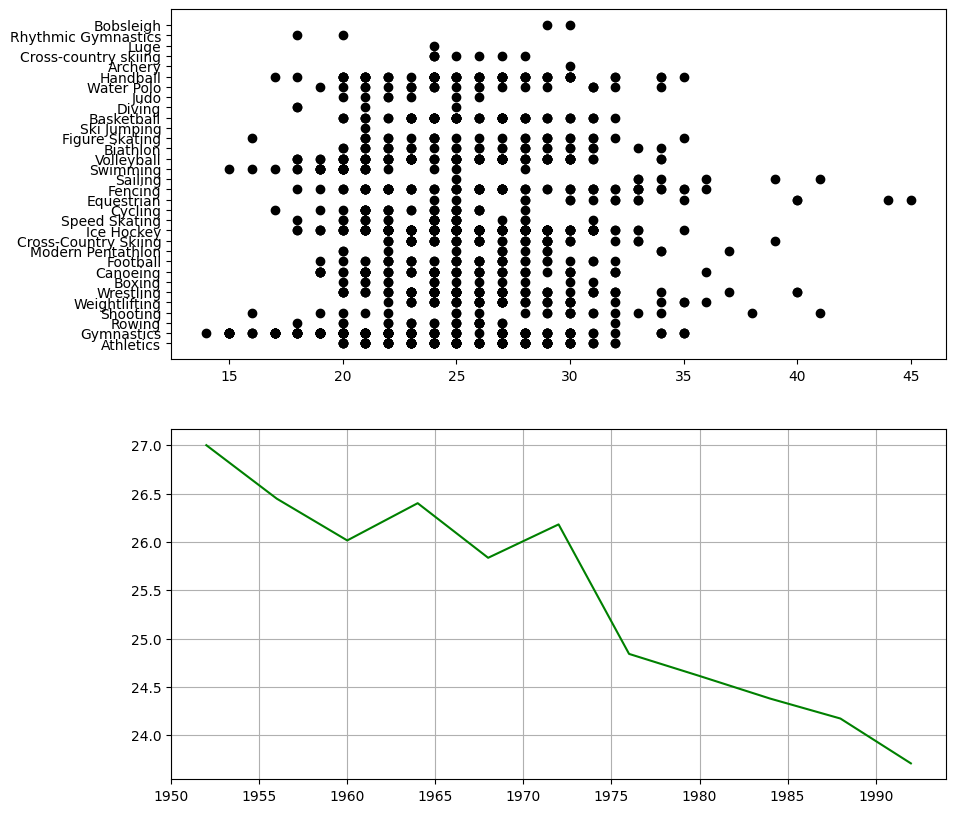

,Sort,Year,Sport,Gender,Event,Athlete,Age,Result,Medal,Country,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Birth year
0,1,1896,Athletics,M,100m,Tom Burke,21.0,12,GOLD,Greece,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1875.0
1,2,1896,Athletics,M,100m,Fritz Hofmann,24.0,12.2,SILVER,Greece,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1872.0
2,3,1896,Athletics,M,100m,Francis Lane,21.0,12.6,BRONZE,Greece,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1875.0
3,4,1896,Athletics,M,100m,Alajos Szokolyi,24.0,12.6,BRONZE,Greece,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1872.0
4,5,1896,Athletics,M,400m,Tom Burke,21.0,54.2,GOLD,Greece,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39936,39936,2016,Wrestling,M,98,Ghasem Rezaei,30.0,NaN,BRONZE,Brazil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986.0
39937,39937,2016,Wrestling,M,130,Mijain Lopez,33.0,NaN,GOLD,Brazil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.0
39938,39938,2016,Wrestling,M,130,Riza Kayaalp,26.0,NaN,SILVER,Brazil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990.0
39939,39939,2016,Wrestling,M,130,Sabah Shariati,27.0,NaN,BRONZE,Brazil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989.0


In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

dff = pd.read_excel("Olympics 2018.xlsx", sheet_name='Olympics') 
df = dff[(dff['Team'] == 'Soviet Union') & (dff['Medal'] == 'GOLD')]
x = df['Age']
y = df['Sport']
fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].scatter(x, y, color='black')
axs[0].set_facecolor('white')

axs[1].plot(df.groupby('Year').Age.mean().dropna(), color='green')

plt.grid(True)
plt.savefig("USSR.pdf", format='pdf')
plt.show()

newDf = dff[dff['Season'] == 'Summer']
newDf = newDf.drop(columns=['City'])
newDf['Birth year'] = dff['Year'] - dff['Age'] 
newDf.to_excel('olympics.xlsx', sheet_name='Olympics')
newDf